# 1 - Import Libraries

In [2]:
import tensorflow as tf
import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tensorflow.keras import Sequential , layers  
from tensorflow.keras.layers import LSTM, Dense
pd.set_option('display.max_columns', None) # This coomand will display all columns in the dataframe
pd.set_option('display.max_rows', None) # This coomand will display all rows in the dataframe

# WARNING : JUST RUN IT IF YOU WANT SAVE THE CHANGES

In [3]:
# data.to_csv('data.csv', index=False)

## 1.1 Take values from the Database , CSV file.

In [8]:
data = pd.read_csv('data.csv')

#### 1.2 Drops the Nan values from the collumns DAMAGE_PROPERTY and DAMAGE_CROPS if "BOTH" doesn't have values.

In [9]:
data = data.dropna(subset=['DAMAGE_PROPERTY','DAMAGE_CROPS'], how='all')

## Convert the string to  floating

In [10]:
# Function to convert suffixes to multipliers
def convert_suffix(value):
    if value ==np.nan:
        return value
    else:
        if type(value) == str:
            suffixes = {'K': 1000, 'M': 1000000, 'B': 1000000000}
            multiplier = value[-1]
            return float(value[:-1]) * suffixes[multiplier]
            
        else:
            return float(value)

In [11]:
data['DAMAGE_CROPS'] = data['DAMAGE_CROPS'].apply(convert_suffix)

## 1.2 Information about the Dataset 

In [12]:
data.head(5)

,Unnamed: 0,BEGIN_DAY,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,YEAR,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,YEARMONTH,LATITUDE,LONGITUDE,EVENT_YM_B,EVENT_YM_E,MONTH,TOTAL_DAMAGE,MONTH_SIN,MONTH_COS
0,0,21,300,21,600,36775,213816,FLORIDA,2010,Flash Flood,2010-01-21 03:00:00,2010-01-21 06:00:00,0,0,0,0,0.0,0.0,30.9958,-87.2388,30.9901,-87.2318,201001,30.9958,-87.2388,2010-01-01,2010-01-01,1,0.0,0.500000,8.660254e-01
1,4,11,1816,16,830,36906,214762,IOWA,2010,Flood,2010-03-11 18:16:00,2010-03-16 08:30:00,0,0,0,0,50000.0,0.0,42.5589,-92.5583,42.5886,-92.7608,201003,42.5589,-92.5583,2010-03-01,2010-03-01,3,50000.0,1.000000,6.123234e-17
2,8,6,1642,6,1644,37029,215471,IOWA,2010,Hail,2010-04-06 16:42:00,2010-04-06 16:44:00,0,0,0,0,0.0,0.0,42.6800,-91.9100,42.6800,-91.9100,201004,42.6800,-91.9100,2010-04-01,2010-04-01,4,0.0,0.866025,-5.000000e-01
3,11,27,1932,27,1934,44621,258782,SOUTH CAROLINA,2010,Thunderstorm Wind,2010-10-27 19:32:00,2010-10-27 19:34:00,0,0,0,0,1000.0,0.0,33.9420,-81.9282,33.9420,-81.9282,201010,33.9420,-81.9282,2010-10-01,2010-10-01,10,1000.0,-0.866025,5.000000e-01
4,17,24,2117,24,2117,44690,259274,TEXAS,2010,Thunderstorm Wind,2010-10-24 21:17:00,2010-10-24 21:17:00,0,0,0,0,0.0,0.0,32.1800,-95.2200,32.1800,-95.2200,201010,32.1800,-95.2200,2010-10-01,2010-10-01,10,0.0,-0.866025,5.000000e-01


In [13]:
data.shape

(419123, 31)

In [14]:
data.isnull().sum()

Unnamed: 0               0
BEGIN_DAY                0
BEGIN_TIME               0
END_DAY                  0
END_TIME                 0
EPISODE_ID               0
EVENT_ID                 0
STATE                    0
YEAR                     0
EVENT_TYPE               0
BEGIN_DATE_TIME          0
END_DATE_TIME            0
INJURIES_DIRECT          0
INJURIES_INDIRECT        0
DEATHS_DIRECT            0
DEATHS_INDIRECT          0
DAMAGE_PROPERTY      13372
DAMAGE_CROPS         14626
BEGIN_LAT                0
BEGIN_LON                0
END_LAT                  0
END_LON                  0
YEARMONTH                0
LATITUDE                 0
LONGITUDE                0
EVENT_YM_B               0
EVENT_YM_E               0
MONTH                    0
TOTAL_DAMAGE         27998
MONTH_SIN                0
MONTH_COS                0
dtype: int64

In [15]:
data.isna().sum()

Unnamed: 0               0
BEGIN_DAY                0
BEGIN_TIME               0
END_DAY                  0
END_TIME                 0
EPISODE_ID               0
EVENT_ID                 0
STATE                    0
YEAR                     0
EVENT_TYPE               0
BEGIN_DATE_TIME          0
END_DATE_TIME            0
INJURIES_DIRECT          0
INJURIES_INDIRECT        0
DEATHS_DIRECT            0
DEATHS_INDIRECT          0
DAMAGE_PROPERTY      13372
DAMAGE_CROPS         14626
BEGIN_LAT                0
BEGIN_LON                0
END_LAT                  0
END_LON                  0
YEARMONTH                0
LATITUDE                 0
LONGITUDE                0
EVENT_YM_B               0
EVENT_YM_E               0
MONTH                    0
TOTAL_DAMAGE         27998
MONTH_SIN                0
MONTH_COS                0
dtype: int64

In [16]:
data.columns
data.drop([], axis=1, inplace=True)

Index(['Unnamed: 0', 'BEGIN_DAY', 'BEGIN_TIME', 'END_DAY', 'END_TIME',
       'EPISODE_ID', 'EVENT_ID', 'STATE', 'YEAR', 'EVENT_TYPE',
       'BEGIN_DATE_TIME', 'END_DATE_TIME', 'INJURIES_DIRECT',
       'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT',
       'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'YEARMONTH', 'LATITUDE', 'LONGITUDE', 'EVENT_YM_B',
       'EVENT_YM_E', 'MONTH', 'TOTAL_DAMAGE', 'MONTH_SIN', 'MONTH_COS'],
      dtype='object')

In [17]:
data.EVENT_TYPE.count()


419123

## Apply function lambda to get the month of the year

In [18]:
grouped_data = data.groupby(['EVENT_TYPE','YEARMONTH']).agg({'DAMAGE_PROPERTY': 'sum', 'DAMAGE_CROPS': 'sum', 'INJURIES_DIRECT': 'sum', 'INJURIES_INDIRECT': 'sum', 'DEATHS_DIRECT': 'sum', 'DEATHS_INDIRECT': 'sum'})
grouped_data.head(5)


DAMAGE_PROPERTY  DAMAGE_CROPS  INJURIES_DIRECT  \
EVENT_TYPE  YEARMONTH                                                   
Debris Flow 201207            140000.0           0.0                0   
            201208             20000.0           0.0                0   
            201209                 0.0           0.0                0   
            201210                 0.0           0.0                0   
            201211              3000.0           0.0                0   

                       INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  
EVENT_TYPE  YEARMONTH                                                     
Debris Flow 201207                     0              0                0  
            201208                     0              0                0  
            201209                     0              0                0  
            201210                     0              1                0  
            201211                     0              0                0

In [19]:
data['MONTH'] = data['YEARMONTH'].apply(lambda x: int(str(x)[4:]))


In [21]:
data['TOTAL_DAMAGE'] = data['DAMAGE_PROPERTY'] + data['DAMAGE_CROPS']
data.head()

,Unnamed: 0,BEGIN_DAY,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,YEAR,EVENT_TYPE,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,YEARMONTH,LATITUDE,LONGITUDE,EVENT_YM_B,EVENT_YM_E,MONTH,TOTAL_DAMAGE,MONTH_SIN,MONTH_COS
0,0,21,300,21,600,36775,213816,FLORIDA,2010,Flash Flood,2010-01-21 03:00:00,2010-01-21 06:00:00,0,0,0,0,0.0,0.0,30.9958,-87.2388,30.9901,-87.2318,201001,30.9958,-87.2388,2010-01-01,2010-01-01,1,0.0,0.500000,8.660254e-01
1,4,11,1816,16,830,36906,214762,IOWA,2010,Flood,2010-03-11 18:16:00,2010-03-16 08:30:00,0,0,0,0,50000.0,0.0,42.5589,-92.5583,42.5886,-92.7608,201003,42.5589,-92.5583,2010-03-01,2010-03-01,3,50000.0,1.000000,6.123234e-17
2,8,6,1642,6,1644,37029,215471,IOWA,2010,Hail,2010-04-06 16:42:00,2010-04-06 16:44:00,0,0,0,0,0.0,0.0,42.6800,-91.9100,42.6800,-91.9100,201004,42.6800,-91.9100,2010-04-01,2010-04-01,4,0.0,0.866025,-5.000000e-01
3,11,27,1932,27,1934,44621,258782,SOUTH CAROLINA,2010,Thunderstorm Wind,2010-10-27 19:32:00,2010-10-27 19:34:00,0,0,0,0,1000.0,0.0,33.9420,-81.9282,33.9420,-81.9282,201010,33.9420,-81.9282,2010-10-01,2010-10-01,10,1000.0,-0.866025,5.000000e-01
4,17,24,2117,24,2117,44690,259274,TEXAS,2010,Thunderstorm Wind,2010-10-24 21:17:00,2010-10-24 21:17:00,0,0,0,0,0.0,0.0,32.1800,-95.2200,32.1800,-95.2200,201010,32.1800,-95.2200,2010-10-01,2010-10-01,10,0.0,-0.866025,5.000000e-01


In [23]:
def transform_month(month):
    angle = 2 * math.pi * month / 12  # Calculate the angle in radians
    sin_component = math.sin(angle)  # Compute the sine component
    cos_component = math.cos(angle)  # Compute the cosine component
    return sin_component, cos_component


In [24]:
data['MONTH_SIN'], data['MONTH_COS'] = zip(*data['MONTH'].apply(transform_month))

<Axes: xlabel='DAMAGE_PROPERTY', ylabel='Count'>

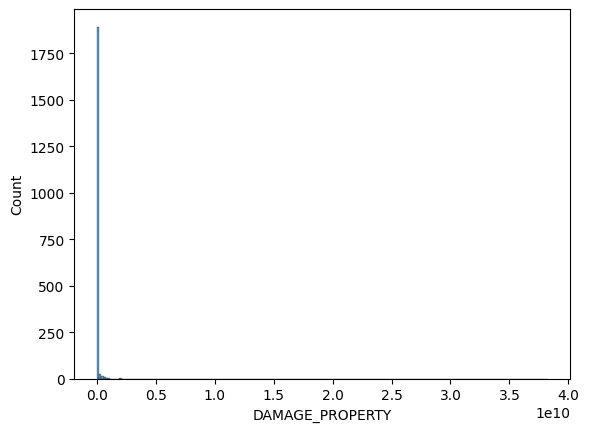

In [ ]:

sns.histplot(grouped_data['DAMAGE_PROPERTY'], bins=200) # Histogram of the property damage

In [ ]:
# Defining the model RNN
model = Sequential()